In [2]:
#import the required packages/ libraries/ modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/My Drive/Colab Notebooks/loans.csv'
data = pd.read_csv(file_path)
data.set_index("client_id", inplace=True)


Mounted at /content/drive


**Display the contents of the dataset by showing its first 5 rows.**

In [3]:
# Display the first few rows of the dataset
data.head(5)

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


**Check the info of the data set**

In [4]:
#check info of the data set
data.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


**Check for the missing values**

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64


**Check if there is a presence of outliers using Boxplot.**

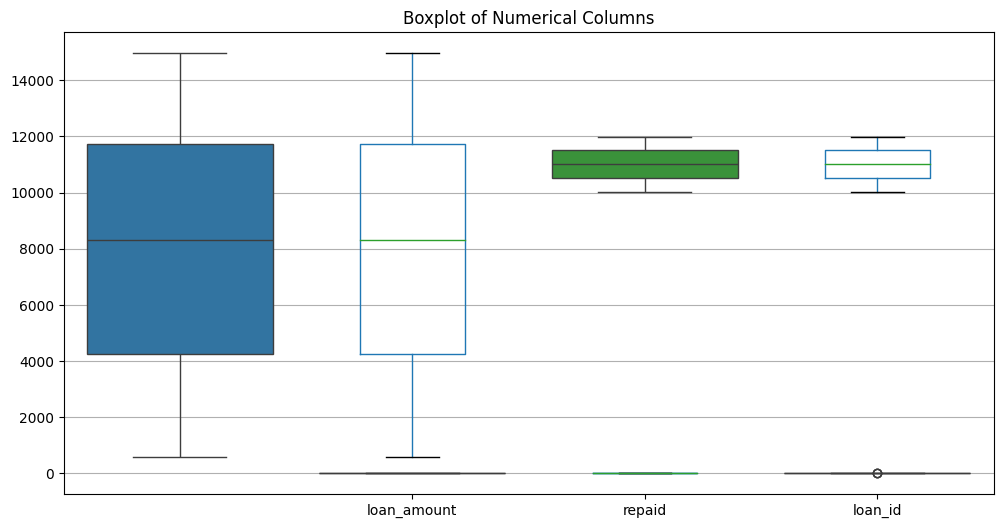

In [6]:
# Create a boxplot of the original data using both matplotlib and Seaborn
plt.figure(figsize=(12, 6))  # Set the size of the figure

# Plot the boxplot using matplotlib
data.boxplot()

# Plot the boxplot using Seaborn
sns.boxplot(data=data)

plt.title('Boxplot of Numerical Columns')  # Set the title of the plot
plt.show()  # Display the plot

**If there are a presence of outliers, do the following and explain the results:**
  
  **a.Treat them using SQRT transformation**


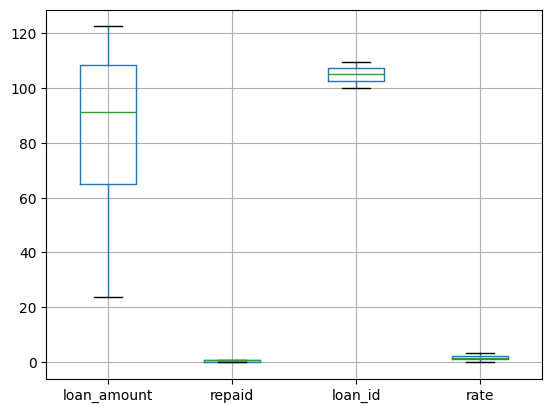

In [8]:
# Create a copy of the original dataset to apply transformations
data_sqrt = data.copy()

# Select numerical columns from the dataset
data_cols = data_sqrt.select_dtypes(include=[np.number]).columns

# Apply square root transformation to the numerical columns
data_sqrt[data_cols] = np.sqrt(data_sqrt[data_cols])

# Create a boxplot of the transformed data
data_sqrt.boxplot()

# Display the plot
plt.show()

**b. Treat them using the capping approach: Z-Score**

In [9]:
from scipy import stats

# Calculate the z-scores for numerical columns
z_scores = np.abs(stats.zscore(data[data_cols]))

# Set the threshold for identifying outliers
threshold = 3

# Filter out rows where all z-scores are less than the threshold
data_z_capped = data[(z_scores < threshold).all(axis=1)]

# Print the number of rows before and after capping outliers
print(f"Num rows before capping: {data.shape[0]}")
print(f"Num rows after capping: {data_z_capped.shape[0]}")

Number of rows before capping: 443
Number of rows after capping: 440


**Upon checking the datatypes for each columns, for numerical variables, apply scaling using Min-Max Normalization. Display the skewness and kurtosis graphs for Loan Amount and explain the results.**

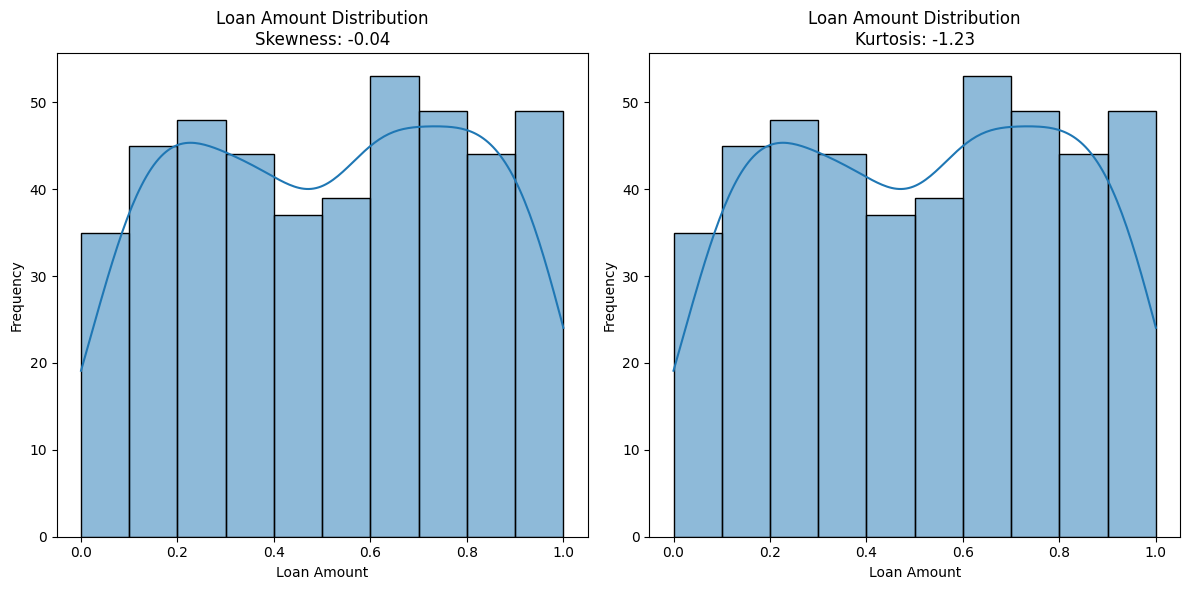

In [12]:
# Identify numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns

# Apply Min-Max Normalization to numerical columns
for col in numerical_cols:
    min_val = data[col].min()
    max_val = data[col].max()
    data[col] = (data[col] - min_val) / (max_val - min_val)

# Display the skewness and kurtosis graphs for Loan Amount
loan_amount = data['loan_amount']

# Calculate skewness and kurtosis for Loan Amount
skewness = stats.skew(loan_amount)
kurtosis = stats.kurtosis(loan_amount)

# Create separate skewness and kurtosis plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Skewness plot
sns.histplot(loan_amount, kde=True, ax=axes[0])
axes[0].set_title(f'Loan Amount Distribution\nSkewness: {skewness:.2f}')
axes[0].set_xlabel('Loan Amount')
axes[0].set_ylabel('Frequency')

# Kurtosis plot
sns.histplot(loan_amount, kde=True, ax=axes[1])
axes[1].set_title(f'Loan Amount Distribution\nKurtosis: {kurtosis:.2f}')
axes[1].set_xlabel('Loan Amount')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**As for the categorical features, apply encoding of categorical variables into dummy variables using pd.get_dummies approach. Show the first five (5) rows.**

In [13]:
# Apply one-hot encoding with drop_first=True using pd.get_dummies
data_dummy = pd.get_dummies(data, drop_first=True)

print(data_dummy.head())

           loan_amount  repaid   loan_id      rate  loan_type_credit  \
client_id                                                              
46109         0.909867     0.0  0.118063  0.169707                 0   
46109         0.640785     0.0  0.491927  0.098335                 1   
46109         0.844782     1.0  0.494955  0.053132                 0   
46109         0.829795     1.0  0.296165  0.097542                 0   
46109         0.936026     1.0  0.709384  0.247423                 1   

           loan_type_home  loan_type_other  loan_start_2000-03-06  \
client_id                                                           
46109                   1                0                      0   
46109                   0                0                      0   
46109                   1                0                      0   
46109                   0                0                      0   
46109                   0                0                      0   

           

**Create new derived features to calculate the tenure of the loan by using the loan_start and loan_end.**

In [14]:
# Convert 'loan_start' and 'loan_end' columns to datetime objects
data['loan_start'] = pd.to_datetime(data['loan_start'])
data['loan_end'] = pd.to_datetime(data['loan_end'])

# Calculate loan tenure in years by subtracting 'loan_start' from 'loan_end' and dividing by 365 days
data['loan_tenure'] = (data['loan_end'] - data['loan_start']).dt.days / 365

print(data[['loan_start', 'loan_end', 'loan_tenure']].head())

          loan_start   loan_end  loan_tenure
client_id                                   
46109     2002-04-16 2003-12-20     1.679452
46109     2003-10-21 2005-07-17     1.739726
46109     2006-02-01 2007-07-05     1.421918
46109     2010-12-08 2013-05-05     2.408219
46109     2010-07-07 2012-05-21     1.873973


**Split the data into training and test sets with 80-20 division.**

In [15]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and target variable (y)
X_data = data.drop('loan_amount', axis=1)  # Features (all columns except 'loan_amount')
y_loan_amount = data['loan_amount']        # Target variable ('loan_amount')

# Splitting the data into training and testing sets
X_train_data, X_test_data, y_train_loan_amount, y_test_loan_amount = train_test_split(X_data, y_loan_amount, test_size=0.2, random_state=42)

# Printing the shapes of the training and testing sets
print("Training set shape:", X_train_data.shape, y_train_loan_amount.shape)
print("Test set shape:", X_test_data.shape, y_test_loan_amount.shape)


Training set shape: (354, 7) (354,)
Test set shape: (89, 7) (89,)
